In [1]:
import sys
import os

# Get the current directory of the notebook
notebook_dir = os.path.abspath('')
_dir = os.path.dirname(notebook_dir)
_dir = os.path.dirname(_dir)
_dir = os.path.dirname(_dir)
sys.path.append(_dir)

<hr />

In [2]:
from util import excel_table, graph, graph_fit
from util.structs import DataCluster, Dataset, Measurement

In [3]:
Ampere_max_skt = 50
Ampere_max = 500 -3
Volt_max_skt = 50
Volt_max = 5
R_max = 130

In [4]:
table = excel_table.read("./data/232d");
header = table[0]
print(header)
table = table[1:]
data = DataCluster()

for row in table:
    dset = Dataset({
        "R_L [%]": Measurement(row[0], 1),
        "U [skt]": Measurement(row[1], 1),
        "I [skt]": Measurement(row[2], 1),
    })
    data.add(dset)

data.print_2();

['R_L [%R_max]' 'U_IR [skt]' 'I [skt]']
I [skt]       | R_L [%]       | U [skt]      
--------------+---------------+--------------
( 20.0 ± 1.0) | ( 10.0 ± 1.0) | ( 12.0 ± 1.0)
( 13.0 ± 1.0) | ( 20.0 ± 1.0) | ( 18.0 ± 1.0)
( 10.0 ± 1.0) | ( 30.0 ± 1.0) | ( 21.0 ± 1.0)
(  8.0 ± 1.0) | ( 40.0 ± 1.0) | ( 23.0 ± 1.0)
(  7.0 ± 1.0) | ( 50.0 ± 1.0) | ( 24.0 ± 1.0)
(  6.0 ± 1.0) | ( 60.0 ± 1.0) | ( 25.0 ± 1.0)
(  3.0 ± 1.0) | (100.0 ± 1.0) | ( 26.0 ± 1.0)
( 35.0 ± 1.0) | (  0.0 ± 1.0) | (  1.0 ± 1.0)



In [5]:
def get_value_from_skt(skt, skt_max, value_max):
    return value_max * (skt / skt_max)

In [ ]:
for d in data:
    d["I [A]"] = get_value_from_skt(d["I [skt]"], Ampere_max_skt, Ampere_max) 
    d["U [V]"] = get_value_from_skt(d["U [skt]"], Volt_max_skt, Volt_max) 
    d[r"R_L [$\Omega]$"] = d["R_L [%]"] * R_max

data = data.copy_remove_index("I [skt]")
data = data.copy_remove_index("U [skt]")
data = data.copy_remove_index("R_L [%]")
data.print_2();

data.save_to_excel_measurements("./output/table_232e")

I [A]         | R_L [$\Omega]$   | U [V]           
--------------+------------------+-----------------
(198.8 ± 9.9) | ( 13.0 ± 1.3)e+2 | ( 12.0 ± 1.0)e-1
(129.2 ± 9.9) | ( 26.0 ± 1.3)e+2 | ( 18.0 ± 1.0)e-1
( 99.4 ± 9.9) | ( 39.0 ± 1.3)e+2 | ( 21.0 ± 1.0)e-1
( 79.5 ± 9.9) | ( 52.0 ± 1.3)e+2 | ( 23.0 ± 1.0)e-1
( 69.6 ± 9.9) | ( 65.0 ± 1.3)e+2 | ( 24.0 ± 1.0)e-1
( 59.6 ± 9.9) | ( 78.0 ± 1.3)e+2 | ( 25.0 ± 1.0)e-1
( 29.8 ± 9.9) | (130.0 ± 1.3)e+2 | ( 26.0 ± 1.0)e-1
(347.9 ± 9.9) | (  0.0 ± 1.3)e+2 | (  1.0 ± 1.0)e-1

           I [A]           R_L [Ω]             U [V]
0  (198.8 ± 9.9)  ( 13.0 ± 1.3)e+2  ( 12.0 ± 1.0)e-1
1  (129.2 ± 9.9)  ( 26.0 ± 1.3)e+2  ( 18.0 ± 1.0)e-1
2  ( 99.4 ± 9.9)  ( 39.0 ± 1.3)e+2  ( 21.0 ± 1.0)e-1
3  ( 79.5 ± 9.9)  ( 52.0 ± 1.3)e+2  ( 23.0 ± 1.0)e-1
4  ( 69.6 ± 9.9)  ( 65.0 ± 1.3)e+2  ( 24.0 ± 1.0)e-1
5  ( 59.6 ± 9.9)  ( 78.0 ± 1.3)e+2  ( 25.0 ± 1.0)e-1
6  ( 29.8 ± 9.9)  (130.0 ± 1.3)e+2  ( 26.0 ± 1.0)e-1
7  (347.9 ± 9.9)  (  0.0 ± 1.3)e+2  (  1.0 ± 1.0)e-1


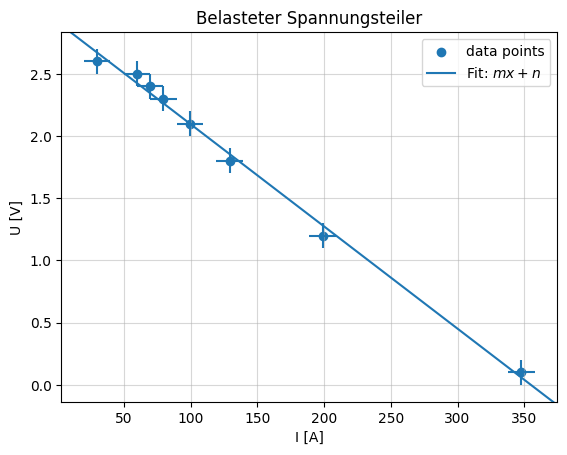

In [7]:
plot = graph.create_plot();

fig, ax = plot

ax.grid(alpha=.5);
ax.set_title("Belasteter Spannungsteiler")
ax.set_xlabel("I [A]")
ax.set_ylabel("U [V]")

graph.scatter_data(data, "I [A]", "U [V]", plot=plot, label="data points");
func, params = graph_fit.Linear.on_data(data, "I [A]", "U [V]")
graph.plot_func(func, plot, change_viewport=False, label=r"Fit: $mx + n$")

ax.legend()

fig.savefig("./output/plot_232e")
fig.savefig("./pdf/plot_232e.pdf")

In [8]:
R_i = - params["m"];
U_0_s = params["n"]

print(U_0_s, R_i)

(291.6 ± 5.8)e-2 ( 82.1 ± 3.7)e-4


In [9]:
R1 = Measurement(20.0, 0.02)
R2 = Measurement(50.0, 0.02)
U_0 = Measurement(4, .2);

U_0_s_2 = R2 / (R1 + R2) * U_0
R_i_2 = R1 * R2 / (R1 + R2)

print(U_0_s_2, R_i_2)


( 28.6 ± 1.4)e-1 (1428.6 ± 1.6)e-2
